In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [70]:
data.head()
data.shape

(42000, 785)

In [79]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape


In [80]:
Y_train
Y_dev.shape

(1000,)

In [81]:
def init_params():
    w1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5

    w2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5

    return w1,b1,w2,b2

def Relu(Z):
    return np.maximum(0,Z)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(w1,b1,w2,b2,X):
    Z1 = w1.dot(X) + b1
    A1 = Relu(Z1)
    Z2 = w2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2
    
def one_hot_encoding(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_final = one_hot_Y.T
    return one_hot_final

def deriv_relu(Z):
    return Z > 0

def backward_prop(z1, a1, z2, a2,w1, w2, x, y):
    one_hot_y = one_hot_encoding(y)
    dz2 = a2 - one_hot_y
    dw2 = 1 / m * dz2.dot(a1.T)
    db2 = 1 / m * np.sum(dz2)
    dz1 = w2.T.dot(dz2) * deriv_relu(z1)
    dw1 = 1 / m * dz1.dot(x.T)
    db1 = 1 / m * np.sum(dz1)
    return dw1, db1, dw2, db2

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2
    return w1, b1, w2, b2

In [82]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [83]:
w1, b1, w2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
[3 9 9 ... 3 4 3] [7 0 9 ... 4 5 7]
0.08095121951219512
Iteration:  10
[7 9 7 ... 3 4 3] [7 0 9 ... 4 5 7]
0.1714878048780488
Iteration:  20
[7 0 7 ... 2 4 7] [7 0 9 ... 4 5 7]
0.2803658536585366
Iteration:  30
[7 0 7 ... 2 4 7] [7 0 9 ... 4 5 7]
0.35168292682926827
Iteration:  40
[7 0 7 ... 2 4 7] [7 0 9 ... 4 5 7]
0.4112682926829268
Iteration:  50
[7 0 7 ... 6 5 7] [7 0 9 ... 4 5 7]
0.4660975609756098
Iteration:  60
[7 0 9 ... 6 5 7] [7 0 9 ... 4 5 7]
0.5105609756097561
Iteration:  70
[7 0 9 ... 6 5 7] [7 0 9 ... 4 5 7]
0.5503170731707318
Iteration:  80
[7 0 9 ... 6 5 7] [7 0 9 ... 4 5 7]
0.5842195121951219
Iteration:  90
[7 0 9 ... 6 5 7] [7 0 9 ... 4 5 7]
0.6131219512195122
Iteration:  100
[7 0 9 ... 6 5 7] [7 0 9 ... 4 5 7]
0.6394390243902439
Iteration:  110
[7 0 9 ... 6 5 7] [7 0 9 ... 4 5 7]
0.6624878048780488
Iteration:  120
[7 0 9 ... 6 5 7] [7 0 9 ... 4 5 7]
0.6824634146341464
Iteration:  130
[7 0 9 ... 6 5 7] [7 0 9 ... 4 5 7]
0.6996341463414634
Iteration:  140

In [84]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


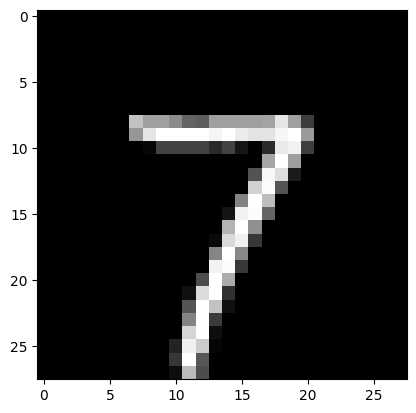

Prediction:  [0]
Label:  0


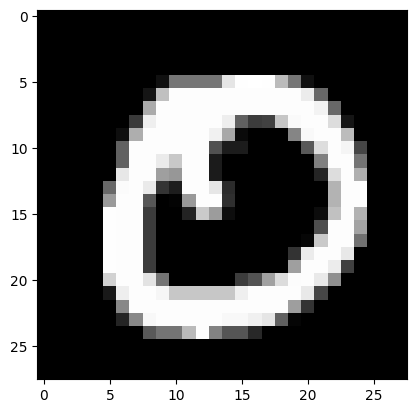

Prediction:  [9]
Label:  9


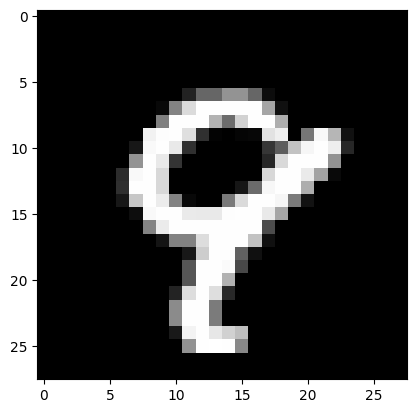

Prediction:  [6]
Label:  8


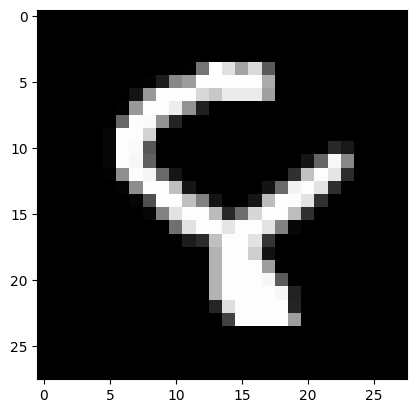

In [85]:
test_prediction(0, w1, b1, w2, b2)
test_prediction(1, w1, b1, w2, b2)
test_prediction(2, w1, b1, w2, b2)
test_prediction(3, w1, b1, w2, b2)

In [86]:
dev_predictions = make_predictions(X_dev, w1, b1, w2, b2)
print(Y_dev.shape)
get_accuracy(dev_predictions, Y_dev)


(1000,)
[0 9 1 6 2 2 5 0 3 5 2 9 7 2 9 3 4 3 5 1 8 4 8 5 2 0 5 1 0 6 1 4 7 6 7 2 1
 1 1 9 6 7 2 1 7 5 3 6 1 5 6 7 8 4 3 6 9 2 6 7 3 0 0 2 5 2 3 8 7 8 1 9 6 6
 2 3 2 3 6 6 7 5 1 8 0 8 2 2 9 1 8 9 0 9 4 2 6 0 6 8 4 4 2 7 1 8 1 1 7 7 4
 9 9 1 3 4 2 4 7 2 4 0 5 4 7 3 6 6 3 3 5 4 5 7 3 6 9 6 7 6 5 8 1 9 7 5 1 9
 7 8 9 9 9 5 8 2 1 7 0 4 5 0 0 2 7 1 4 8 8 7 6 9 6 0 3 8 1 2 3 1 1 6 1 0 2
 6 4 2 9 9 0 1 2 3 7 1 4 8 1 1 3 5 4 6 3 9 0 2 7 9 7 5 8 3 2 9 8 3 0 1 0 8
 8 7 6 9 9 9 0 6 3 8 9 4 6 7 0 2 9 3 9 7 9 8 1 4 5 1 9 0 6 2 6 1 9 7 7 9 7
 7 3 0 1 9 2 7 3 0 5 3 5 2 4 3 6 6 3 7 3 3 1 4 4 1 2 8 5 9 2 4 6 2 2 3 1 8
 3 9 5 3 7 3 4 2 4 9 1 8 1 0 9 8 2 7 2 1 5 7 5 1 3 7 8 4 2 0 4 8 8 4 4 6 3
 3 3 8 7 9 3 8 2 2 3 8 0 6 4 6 0 5 6 0 7 1 4 0 0 6 2 4 0 1 5 6 9 7 8 8 5 5
 4 6 5 3 1 4 8 5 4 8 5 1 8 0 2 9 1 5 3 7 7 4 6 0 1 0 1 5 6 1 8 7 4 2 9 2 2
 0 0 1 3 3 1 1 1 9 6 3 8 3 1 1 7 2 1 6 9 3 1 2 7 1 7 5 6 6 9 3 6 6 4 4 6 3
 5 9 4 4 2 3 5 9 4 7 5 2 2 7 7 3 5 7 8 2 4 6 0 0 5 3 6 9 3 6 7 0 7 5 8 9 5
 1 7 4 6 6 8 7 8 

0.853